#### Imports

Import the necessary libraries to run the notebook. 

In [1]:
from web3 import Web3
import json
import requests
from IPython.display import Image
from IPython.core.display import HTML 

#### Connection

Connect to the Ethereum network using the Infura URL provided. Then check if the connection is successful by calling the `web3.isConnected()` method.

In [2]:
infura_url= 'https://mainnet.infura.io/v3/[YOUR API KEY]'
web3= Web3(Web3.HTTPProvider (infura_url))
web3.isConnected()

True

## Wolf game - sheep and wolf

#### Connecting to the Smart Contract
Use the `web3.eth.contract()` method to connect to the smart contract stored in the `sc_address` variable, using the ABI stored in the `abi` variable. 

In [3]:
sc_address="0x7F36182DeE28c45dE6072a34D29855BaE76DBe2f"
with open ("./wolf_abi.json") as f:
    abi= json.load (f)

In [4]:
wolfContract = web3.eth.contract(address=sc_address, abi=abi)

#### Finding the data
Use the `web3.eth.getTransactionReceipt()` method to retrieve the transaction receipt for the transaction stored in the `transaction` variable. We will analyze the first log in the `first_tx` variable.

In [5]:
transaction='0xc7fa87b19a6cc7735c49753442fc034fd6ed5d5c1b5250c56eebed428376272e'
txreceipt= web3.eth.getTransactionReceipt (transaction)
first_tx=txreceipt["logs"][0]
first_tx

AttributeDict({'address': '0x7F36182DeE28c45dE6072a34D29855BaE76DBe2f',
 'blockHash': HexBytes('0xd1cc991f996c5247fe8c0f982a0ee077131da15b068b5f51fc06aae62dd44ce2'),
 'blockNumber': 15980673,
 'data': '0x',
 'logIndex': 127,
 'removed': False,
 'topics': [HexBytes('0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef'),
  HexBytes('0x0000000000000000000000000000000000000000000000000000000000000000'),
  HexBytes('0x0000000000000000000000000a2542a170aa02b96b588aa3af8b09ab22a9d7ac'),
  HexBytes('0x000000000000000000000000000000000000000000000000000000000000120a')],
 'transactionHash': HexBytes('0xc7fa87b19a6cc7735c49753442fc034fd6ed5d5c1b5250c56eebed428376272e'),
 'transactionIndex': 72})

We decode the logs.

In [6]:
%%capture --no-display
txreceipt= web3.eth.getTransactionReceipt (transaction)
abi_events = [abi for abi in wolfContract.abi if abi["type"] == "event"]
for event in abi_events:
    name = event["name"]
    inputs = [param["type"] for param in event["inputs"]]
    inputs = ",".join(inputs)
    event_abi_human = f"{name}({inputs})"
    event_abi_hex = web3.toHex(web3.keccak(text=event_abi_human))
    for l in range (0, len (txreceipt['logs'])):
        event_hex = web3.toHex(txreceipt['logs'][l]['topics'][0])
        if event_abi_hex == event_hex:
            decoded_logs = wolfContract.events[event["name"]]().processReceipt(txreceipt)

In [7]:
decoded_logs[0]

AttributeDict({'args': AttributeDict({'from': '0x0000000000000000000000000000000000000000',
  'to': '0x0a2542a170aA02B96B588aA3AF8B09AB22a9D7ac',
  'tokenId': 4618}),
 'event': 'Transfer',
 'logIndex': 127,
 'transactionIndex': 72,
 'transactionHash': HexBytes('0xc7fa87b19a6cc7735c49753442fc034fd6ed5d5c1b5250c56eebed428376272e'),
 'address': '0x7F36182DeE28c45dE6072a34D29855BaE76DBe2f',
 'blockHash': HexBytes('0xd1cc991f996c5247fe8c0f982a0ee077131da15b068b5f51fc06aae62dd44ce2'),
 'blockNumber': 15980673})

#### Total mints - call to State data 

Retrieve a list of all the functions available in the `wolfContract` object.

In [10]:
wolfContract.all_functions()

[<Function ORIGINAL_SUPPLY()>,
 <Function addController(address)>,
 <Function approve(address,uint256)>,
 <Function balanceOf(address)>,
 <Function barn()>,
 <Function controllers(address)>,
 <Function getApproved(uint256)>,
 <Function initialize(address,address)>,
 <Function isApprovedForAll(address,address)>,
 <Function migrate(uint256[])>,
 <Function mint(address)>,
 <Function minted()>,
 <Function name()>,
 <Function originalMetadata()>,
 <Function owner()>,
 <Function ownerOf(uint256)>,
 <Function paused()>,
 <Function removeController(address)>,
 <Function renounceOwnership()>,
 <Function safeTransferFrom(address,address,uint256)>,
 <Function safeTransferFrom(address,address,uint256,bytes)>,
 <Function setApprovalForAll(address,bool)>,
 <Function setOriginalMetadata(address)>,
 <Function setPaused(bool)>,
 <Function setUnoriginalMetadata(address)>,
 <Function supportsInterface(bytes4)>,
 <Function symbol()>,
 <Function tokenURI(uint256)>,
 <Function transferFrom(address,address,u

In [11]:
print ("Original supply: ", wolfContract.functions.ORIGINAL_SUPPLY().call())

Original supply:  13809


### Axie Infinity API

Connect to the Skymavis API and retrieve the leaderboard. This is off-chain data. 

In [14]:
api_key= "[YOUR API KEY]"
headers = {"accept": "application/json",
          "X-API-Key": api_key}

In [15]:
url_leader = "https://api-gateway.skymavis.com/origin/v2/leaderboards?limit=1"
response = requests.get(url_leader, headers=headers).json()
leader= response["_items"][0]["userID"]

Retrieve leaderboard user items

In [16]:
itemID_url = "https://api-gateway.skymavis.com/origin/v2/community/users/items?userID="+leader #this query is limited to 20 items.
response = requests.get(itemID_url, headers=headers).json()

Retrieve the details of each item

Item ID is: ancient_crescent
Item image is hosted on: https://storage.googleapis.com/origin-production/assets/item/ancient_crescent.png


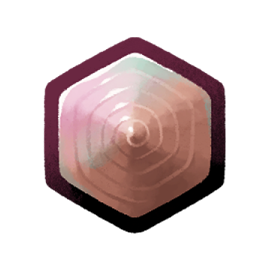

Item ID is: avt_0
Item image is hosted on: https://storage.googleapis.com/origin-production/assets/avatar/0.png


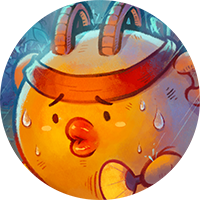

Item ID is: avt_1
Item image is hosted on: https://storage.googleapis.com/origin-production/assets/avatar/1.png


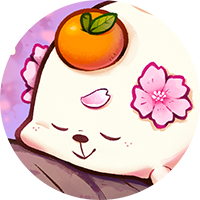

Item ID is: avt_13
Item image is hosted on: https://storage.googleapis.com/origin-production/assets/avatar/13.png


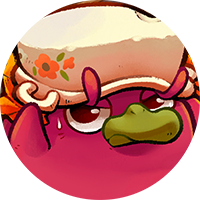

Item ID is: avt_14
Item image is hosted on: https://storage.googleapis.com/origin-production/assets/avatar/14.png


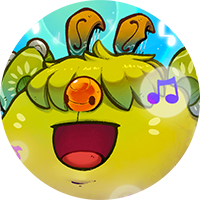

Item ID is: avt_2
Item image is hosted on: https://storage.googleapis.com/origin-production/assets/avatar/2.png


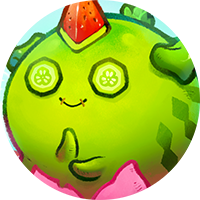

Item ID is: avt_3
Item image is hosted on: https://storage.googleapis.com/origin-production/assets/avatar/3.png


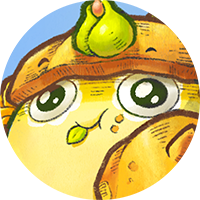

Item ID is: avt_8
Item image is hosted on: https://storage.googleapis.com/origin-production/assets/avatar/8.png


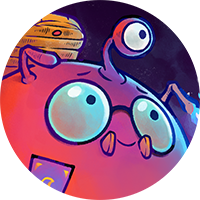

Item ID is: avt_lion_dance_lunar23
Item image is hosted on: https://storage.googleapis.com/origin-production/assets/avatar/lion_dance_lunar23.png


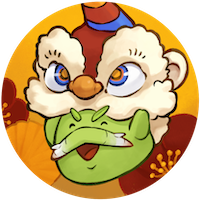

Item ID is: avt_red_envelope_lunar23
Item image is hosted on: https://storage.googleapis.com/origin-production/assets/avatar/red_envelope_lunar23.png


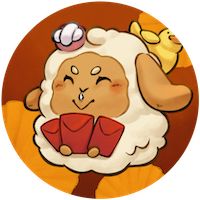

Item ID is: avt_theorycrafter_s2
Item image is hosted on: https://storage.googleapis.com/origin-production/assets/avatar/theorycrafter_s2.png


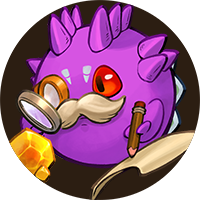

Item ID is: avt_xmas22
Item image is hosted on: https://storage.googleapis.com/origin-production/assets/avatar/xmas22.png


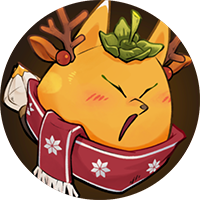

Item ID is: axie_ena
Item image is hosted on: https://storage.googleapis.com/origin-production/assets/item/axie_ena.png


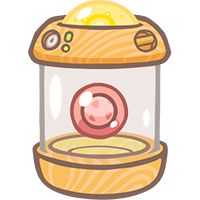

Item ID is: axie_tripp
Item image is hosted on: https://storage.googleapis.com/origin-production/assets/item/axie_tripp.png


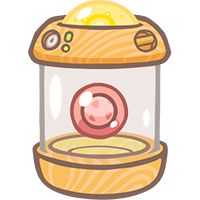

Item ID is: bdr_0
Item image is hosted on: https://storage.googleapis.com/origin-production/assets/border/0.png


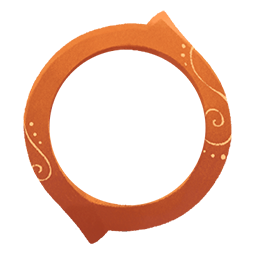

Item ID is: bdr_silver_s1
Item image is hosted on: https://storage.googleapis.com/origin-production/assets/border/s1_silver.png


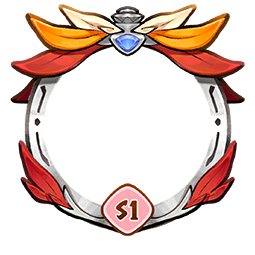

Item ID is: box_chick_4_s1
Item image is hosted on: https://storage.googleapis.com/origin-production/assets/item/selection_chest_1.png


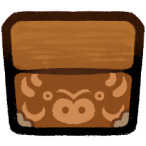

Item ID is: box_test_rune_charm_s1
Item image is hosted on: https://storage.googleapis.com/origin-production/assets/item/selection_chest_4.png


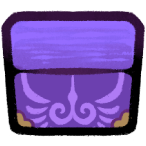

Item ID is: crafting_exp
Item image is hosted on: https://storage.googleapis.com/origin-production/assets/item/exp.png


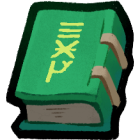

Item ID is: ecard_aquatic_2001_s0_nft
Item image is hosted on: https://storage.googleapis.com/origin-production/assets/item/ecard_aquatic_4001.png


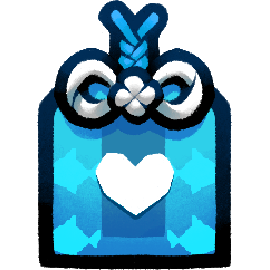

In [17]:
for item in range (0,len (response["_items"])):
    item_id= response["_items"][item]['itemId']
    url_detail = "https://api-gateway.skymavis.com/origin/v2/community/items/"+item_id
    response_detail = (requests.get(url_detail, headers=headers)).json()
    print ("Item ID is:", response_detail['id'])
    print ("Item image is hosted on:", response_detail['imageUrl'])
    display (Image(url= response_detail['imageUrl'], embed= True))